In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [32]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [34]:
data.shape

(440, 8)

In [35]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [36]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [37]:
x = data[[ 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [38]:
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Clustering

In [39]:
from sklearn.cluster import KMeans

In [40]:
wcss = []
for i in range (1,11):
  km = KMeans(n_clusters= i,n_init=10,init= 'k-means++')
  km.fit(x)
  css = km.inertia_ #wcss score
  wcss.append(css)


In [41]:
wcss

[157595857165.60907,
 113217528520.90988,
 80332413843.01634,
 64855545528.211044,
 52928148942.57612,
 47434192373.43581,
 41621414910.20488,
 36332132160.25098,
 32849857669.837074,
 29765661637.32235]

plotting number of clusters vs wcss score

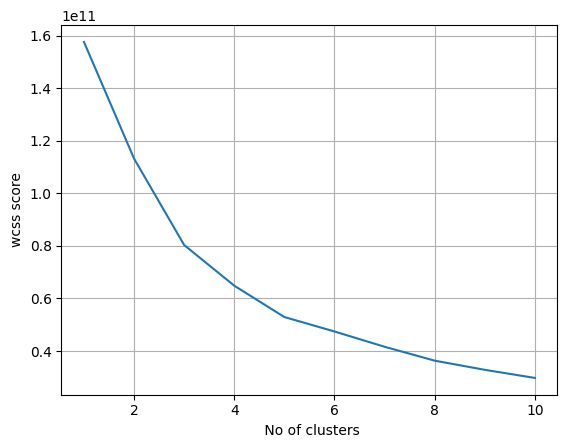

In [42]:
plt.plot(range(1,11),wcss)
plt.xlabel(' No of clusters')
plt.ylabel('wcss score')
plt.grid()
plt.show()

In [43]:
km = KMeans(n_clusters= 5,n_init=10,init= 'k-means++')

In [44]:
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [45]:
cluster_labels = km.predict(x)

In [46]:
cluster_labels

array([0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 4, 4, 4, 0, 0, 0, 4, 0, 4, 0,
       4, 3, 4, 4, 0, 4, 3, 1, 4, 0, 4, 4, 0, 0, 4, 4, 3, 1, 4, 4, 3, 3,
       0, 3, 3, 2, 0, 3, 0, 0, 1, 3, 4, 0, 3, 3, 0, 0, 0, 2, 0, 3, 0, 3,
       0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 0, 3, 0, 0, 0, 3, 0, 4, 0, 2, 2, 1,
       0, 4, 0, 0, 3, 4, 3, 0, 0, 0, 0, 0, 3, 3, 0, 1, 4, 4, 0, 3, 0, 3,
       0, 3, 4, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 1, 4, 4, 0, 1, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 1, 0, 4, 3, 0, 0, 0, 4, 4, 0, 4, 0,
       0, 3, 3, 4, 0, 3, 0, 0, 4, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 4, 0, 0, 3, 0, 4, 4, 0,
       0, 0, 3, 3, 4, 0, 0, 3, 0, 0, 0, 3, 4, 3, 0, 0, 0, 3, 3, 4, 3, 0,
       4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 1, 4, 4,
       4, 0, 0, 3, 0, 0, 4, 0, 0, 3, 0, 4, 0, 4, 0, 0, 1, 1, 0, 0, 4, 0,
       3, 3, 3, 4, 3, 4, 0, 0, 0, 1, 0, 0, 4, 0, 0, 4, 0, 0, 1, 4, 1, 1,
       0, 4, 4, 1, 0, 0, 0, 3, 4, 0, 4, 0, 0, 0, 4,

In [47]:
pd.Series(cluster_labels).value_counts()

0    235
4    106
3     71
1     23
2      5
dtype: int64

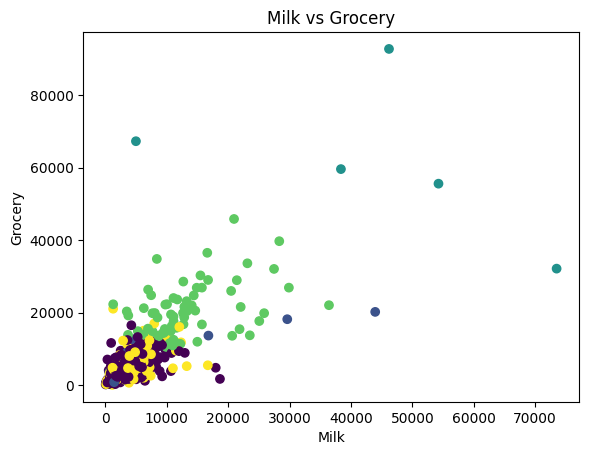

In [48]:
plt.scatter(x['Milk'],x['Grocery'],c = cluster_labels)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Milk vs Grocery')

plt.show()

In [49]:
cluster_indices = np.where(cluster_labels==0)

In [50]:
cluster_indices

(array([  0,   1,   2,   3,   5,   6,   7,   8,  10,  11,  15,  16,  17,
         19,  21,  26,  31,  34,  35,  44,  48,  50,  51,  55,  58,  59,
         60,  62,  64,  66,  68,  69,  72,  74,  76,  78,  79,  80,  82,
         84,  88,  90,  91,  95,  96,  97,  98,  99, 102, 106, 108, 110,
        115, 116, 117, 119, 121, 122, 123, 128, 130, 131, 133, 134, 135,
        136, 137, 138, 139, 143, 146, 147, 148, 151, 153, 154, 158, 160,
        161, 164, 166, 167, 168, 169, 172, 174, 175, 177, 178, 179, 180,
        182, 184, 185, 186, 187, 188, 191, 192, 194, 197, 198, 199, 203,
        204, 206, 207, 208, 212, 213, 214, 219, 221, 222, 223, 224, 225,
        227, 228, 229, 230, 231, 233, 235, 236, 238, 243, 244, 246, 247,
        249, 250, 252, 254, 256, 257, 260, 261, 263, 270, 271, 272, 274,
        275, 277, 278, 280, 281, 286, 290, 291, 292, 295, 297, 298, 299,
        302, 305, 308, 310, 313, 314, 316, 317, 318, 320, 321, 323, 326,
        327, 329, 330, 336, 337, 338, 339, 340, 341

In [51]:
data['cluster_labels']= cluster_labels

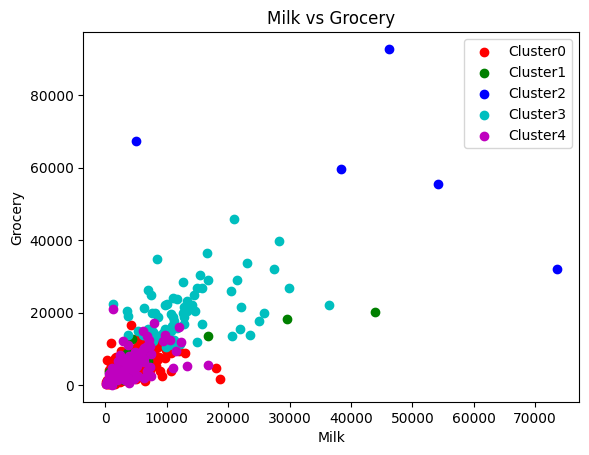

In [52]:
colors = ['r','g','b','c','m']

for i in range(max(cluster_labels)+1):
  cluster_data = data[cluster_labels==i]
  plt.scatter(cluster_data['Milk'],
              cluster_data['Grocery'],
              c = colors[i],
              label =f'Cluster{i}')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Milk vs Grocery')
plt.legend()

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scl_x = scaler.fit_transform(x)

Agglomerative Hierarchical clustering

In [53]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [61]:
mergings = linkage(scl_x,method ='ward')

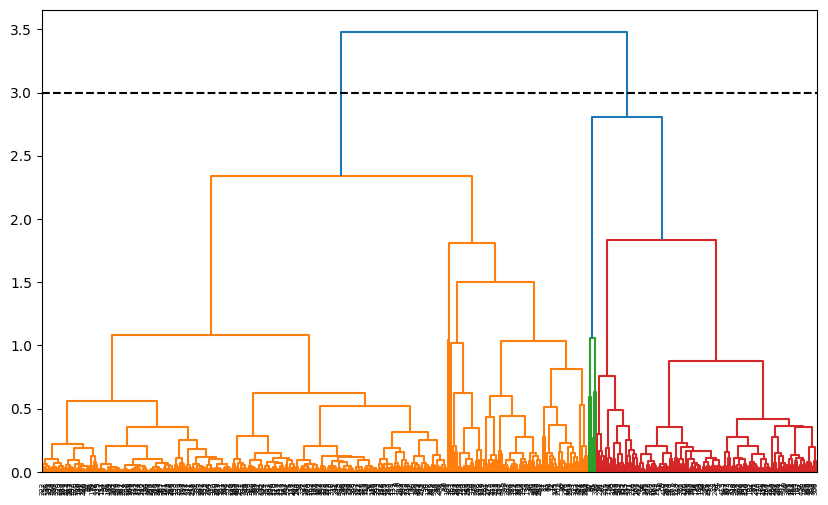

In [63]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(3,color='black',linestyle='--')
plt.show()

In [64]:
cluster_labels_hc = fcluster(mergings,3,criterion = 'distance')

In [65]:
cluster_labels_hc

array([1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,

silhouette_score

In [66]:
from sklearn.metrics import silhouette_score

In [67]:
sil_score = silhouette_score(scl_x,cluster_labels_hc)
sil_score

0.34038518197273104

In [68]:
sil_score = silhouette_score(scl_x,cluster_labels)
sil_score

0.28685927249057014

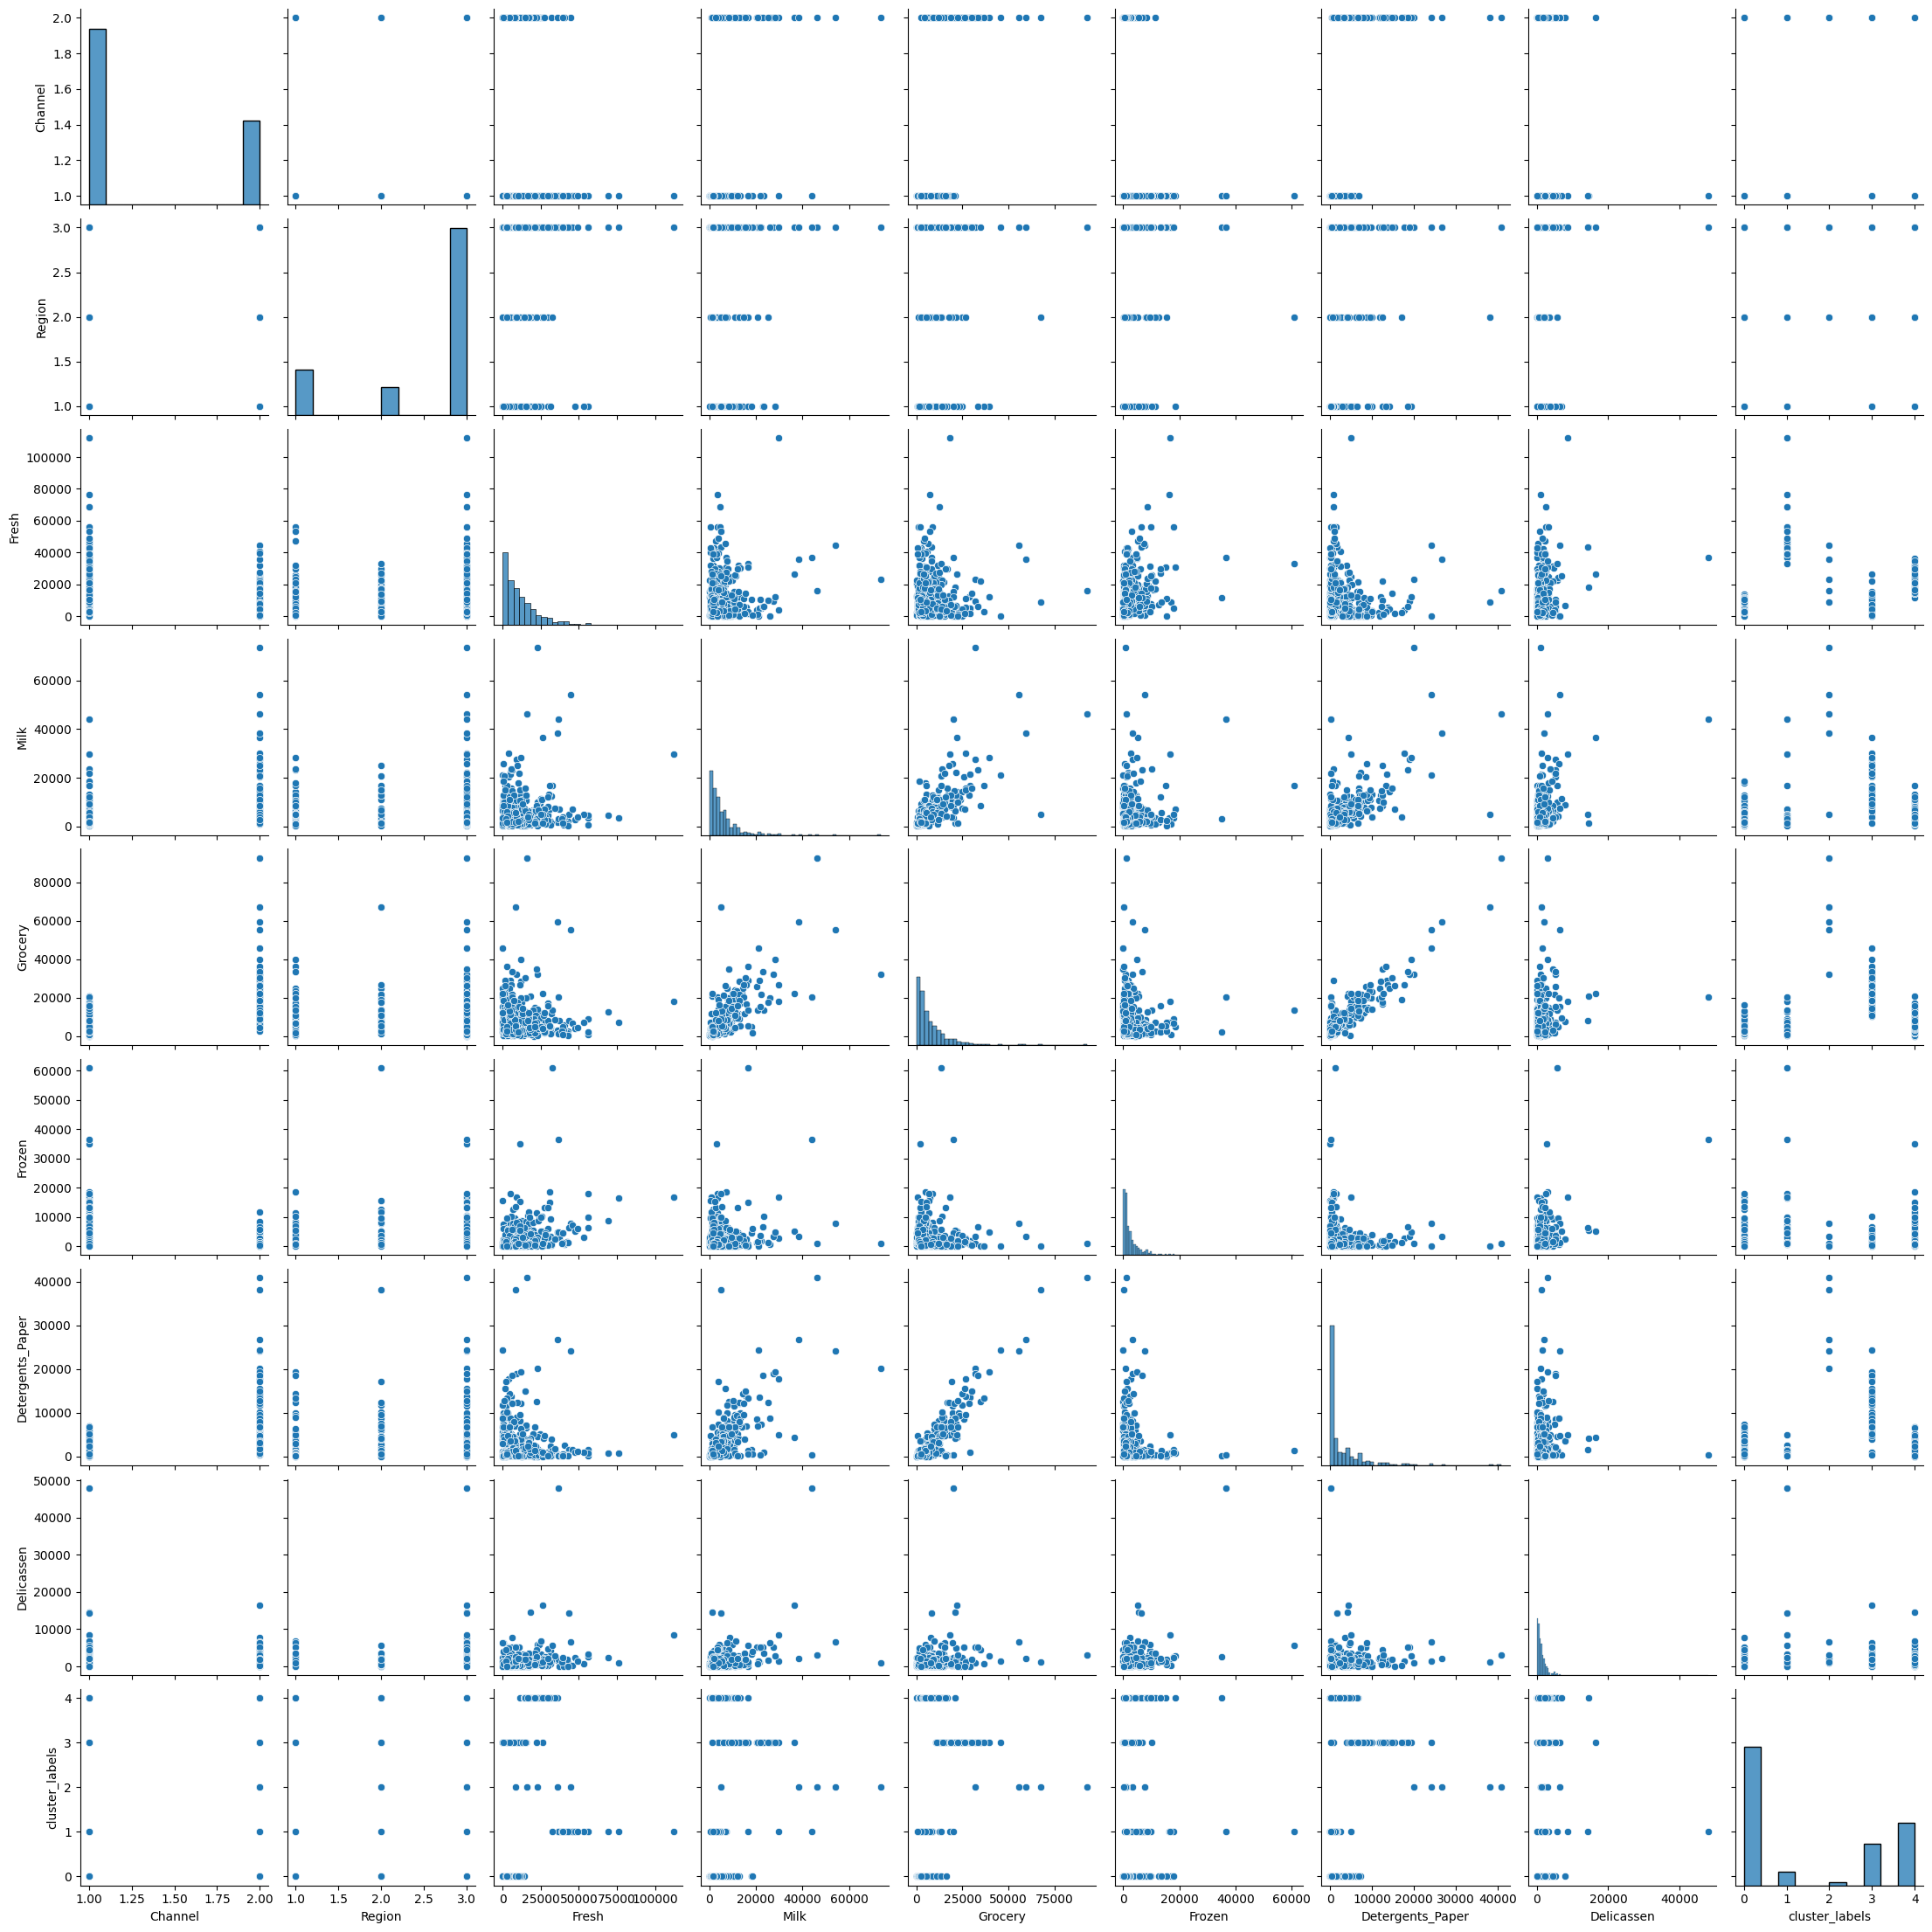

In [69]:
sns.pairplot(data)

In [70]:
data.var() #variance

Channel             2.190723e-01
Region              5.994978e-01
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicassen          7.952997e+06
cluster_labels      3.092876e+00
dtype: float64

In [87]:
x = data.iloc[:,2:]
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,4


In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc.shape

(440, 7)

In [89]:
x_sc_dataframe = pd.DataFrame(x_sc,columns=x.columns)
x_sc_dataframe.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,-0.866832
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,-0.866832
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,-0.866832
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.866832
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1.410219


PCA

In [90]:
from sklearn.decomposition import PCA

In [91]:
pc = PCA()

In [92]:
pc_array = pc.fit_transform(x)

In [93]:
pc_array.shape

(440, 7)

In [94]:
pc_array = pd.DataFrame(pc_array, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [95]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,650.022062,1585.519032,-95.390571,4540.780511,-356.637119,226.711825,1.529009
1,-4426.805003,4042.451519,1534.804804,2567.655682,-44.394283,468.937997,1.319980
2,-4841.998749,2578.762192,3801.384845,2273.494354,5245.385437,-2141.123346,1.128195
3,990.346281,-6279.806056,1396.959865,-3310.006051,318.152335,247.816314,1.382141
4,10657.998818,-2159.725882,-20.043061,172.715350,3188.717123,-510.145064,-2.006635
...,...,...,...,...,...,...,...
435,20140.848669,6306.877024,5732.321503,-4339.060149,-1291.338636,5287.106840,-1.317850
436,25912.249742,-11757.647474,-3275.758812,524.227304,316.064125,-1336.409555,1.584689
437,4555.115389,26201.758576,-5887.432924,-2082.906868,-29.795804,-1030.682166,-0.144936
438,-2734.371080,-7070.775342,-790.702978,1344.547910,1448.412722,-219.126174,1.162524


In [96]:
pc.explained_variance_

array([1.64995905e+08, 1.45452098e+08, 2.51399785e+07, 1.58039005e+07,
       5.39276364e+06, 2.20364065e+06, 2.46206311e+00])

In [97]:
pc.explained_variance_ratio_*100

array([4.59613614e+01, 4.05172265e+01, 7.00300800e+00, 4.40234432e+00,
       1.50221158e+00, 6.13847505e-01, 6.85833826e-07])

In [98]:
pc_array.corr()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
pc1,1.000000e+00,5.379111e-17,-3.471820e-17,-1.786427e-17,-1.306835e-17,5.957830e-17,9.456650e-17
pc2,5.379111e-17,1.000000e+00,3.339523e-16,-1.226554e-16,9.147965e-17,-3.149042e-17,-2.277138e-17
pc3,-3.471820e-17,3.339523e-16,1.000000e+00,6.683911e-17,1.664678e-16,3.418517e-17,-3.387108e-17
pc4,-1.786427e-17,-1.226554e-16,6.683911e-17,1.000000e+00,1.081132e-17,1.905955e-16,-9.216519e-18
pc5,-1.306835e-17,9.147965e-17,1.664678e-16,1.081132e-17,1.000000e+00,-6.153139e-16,-1.496038e-17
pc6,5.957830e-17,-3.149042e-17,3.418517e-17,1.905955e-16,-6.153139e-16,1.000000e+00,1.673255e-17
pc7,9.456650e-17,-2.277138e-17,-3.387108e-17,-9.216519e-18,-1.496038e-17,1.673255e-17,1.000000e+00


DB scan

In [99]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5, min_samples=2*8)
model.fit(x_sc)
np.sum(model.labels_ == -1) / len(model.labels_ == -1) * 100

61.81818181818181

In [100]:
from sklearn.cluster import DBSCAN
number_of_outliers = []
outliers_percent = []
for eps in np.linspace(0.001, 3, 50):
    model = DBSCAN(eps=eps, min_samples=2*8)
    model.fit(x_sc)
    number_of_outliers.append(np.sum(model.labels_ == -1))
    outliers_percent.append(np.sum(model.labels_ == -1) /
                            len(model.labels_ == -1) * 100)

In [101]:
number_of_outliers

[440,
 440,
 440,
 440,
 440,
 389,
 344,
 303,
 274,
 235,
 203,
 176,
 163,
 150,
 113,
 92,
 80,
 73,
 70,
 66,
 63,
 55,
 52,
 49,
 32,
 32,
 31,
 27,
 23,
 23,
 22,
 21,
 21,
 19,
 18,
 17,
 16,
 16,
 16,
 15,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12]

In [102]:
outliers_percent

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 88.4090909090909,
 78.18181818181819,
 68.86363636363636,
 62.272727272727266,
 53.40909090909091,
 46.13636363636363,
 40.0,
 37.04545454545455,
 34.090909090909086,
 25.681818181818183,
 20.909090909090907,
 18.181818181818183,
 16.590909090909093,
 15.909090909090908,
 15.0,
 14.318181818181818,
 12.5,
 11.818181818181818,
 11.136363636363637,
 7.2727272727272725,
 7.2727272727272725,
 7.045454545454545,
 6.136363636363637,
 5.227272727272727,
 5.227272727272727,
 5.0,
 4.772727272727273,
 4.772727272727273,
 4.318181818181818,
 4.090909090909091,
 3.8636363636363633,
 3.6363636363636362,
 3.6363636363636362,
 3.6363636363636362,
 3.4090909090909087,
 2.9545454545454546,
 2.9545454545454546,
 2.9545454545454546,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727]

<Axes: >

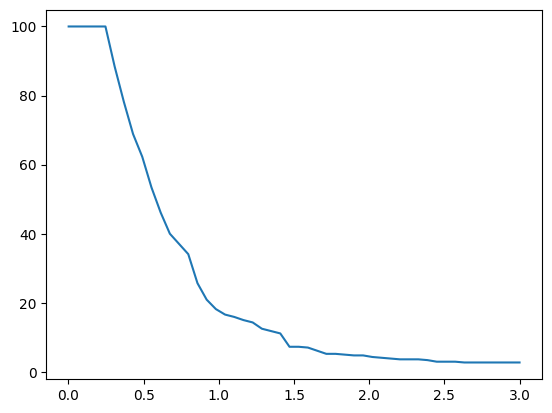

In [103]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=outliers_percent)

In [104]:
model = DBSCAN(eps=1.9, min_samples=2*8)
labels = model.fit_predict(x_sc)

<Axes: xlabel='Grocery', ylabel='Milk'>

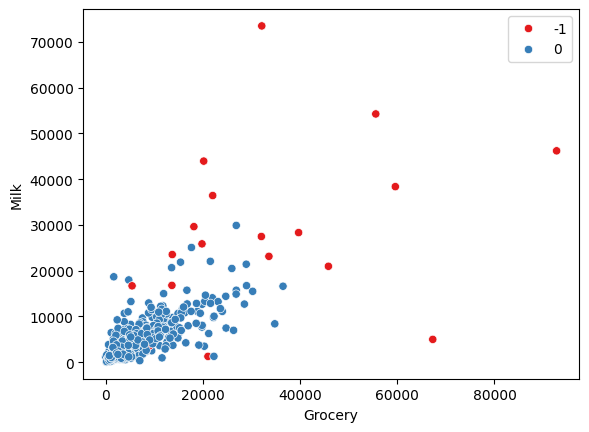

In [106]:
sns.scatterplot(data=data, x='Grocery', y='Milk', hue=labels, palette='Set1')